In [3]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [4]:
#loading the dataset
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [54]:
#Summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

In [53]:
#Counting the fraud and non-fraud transactions in the 'Class' column
class_counts = data['Class'].value_counts()

print("Counts of each unique value in the 'Class' column:")
print(class_counts)

Counts of each unique value in the 'Class' column:
0    284315
1       492
Name: Class, dtype: int64


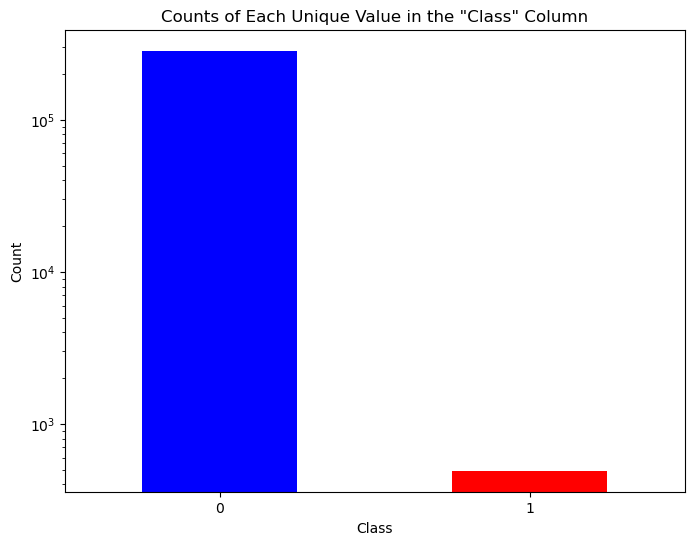

In [56]:
#visualizing the fraud and non-fraud classes
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Counts of Each Unique Value in the "Class" Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.yscale('log')

plt.show()


In [57]:
# Obtain rows where the 'Class' column has a value of 1 (fraudulent transactions)
fraudulent_transactions = data[data['Class'] == 1]

# Print the obtained rows
print("Rows with 'Class' column value of 1 (fraudulent transactions):")
print(fraudulent_transactions)

Rows with 'Class' column value of 1 (fraudulent transactions):
            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670 

In [5]:
#features of the dataset (columns)
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Data Visualization

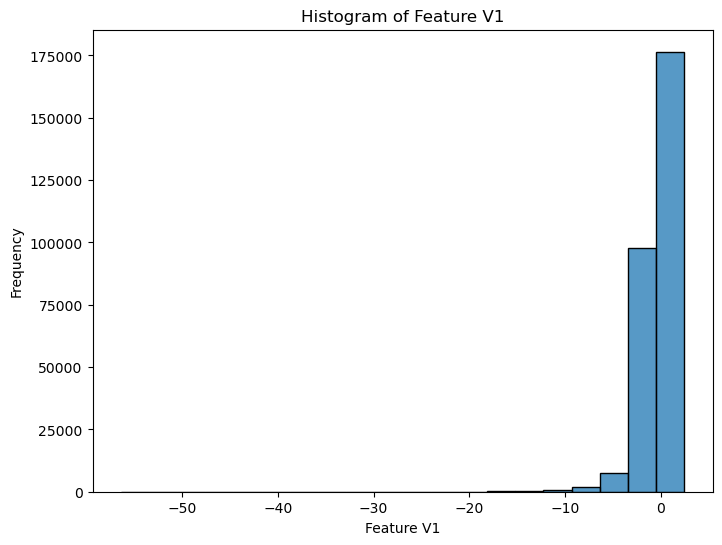

In [11]:
#histogram of feature V1 vs frequency
plt.figure(figsize=(8, 6))
sns.histplot(data['V1'], bins=20)  
plt.title('Histogram of Feature V1')
plt.xlabel('Feature V1')
plt.ylabel('Frequency')
plt.show()

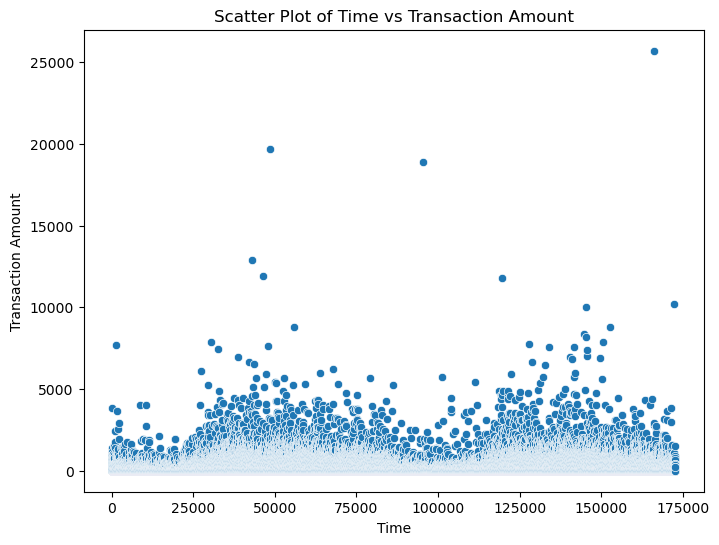

In [12]:
#scatterplot of time vs transaction amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time', y='Amount', data=data)
plt.title('Scatter Plot of Time vs Transaction Amount')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.show()

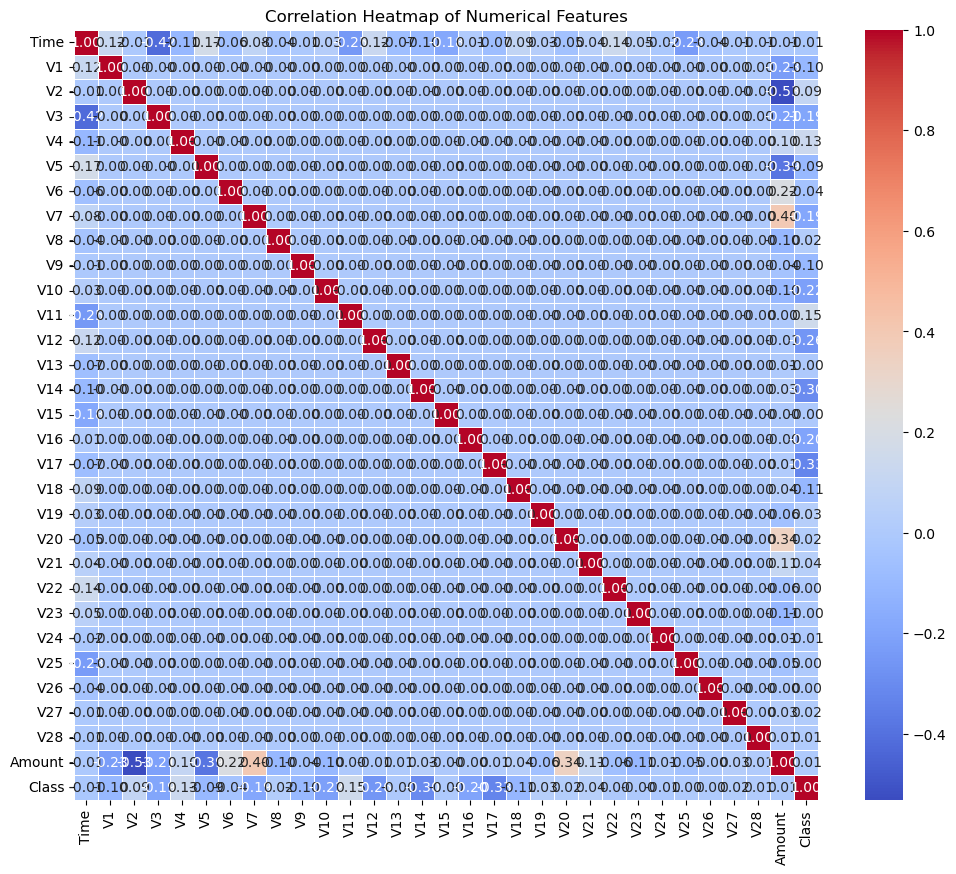

In [14]:
#corr heatmap of numerical features
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# DATA PREPARATION

In [15]:
#handling missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [16]:
#kmeans clustering
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_imputed)

print("Cluster Labels:")
print(clusters)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Labels:
[3 3 3 ... 4 4 4]


In [17]:
#scaling the 'Amount' feature (Quantitative feature is the amount in my dataset)
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data[['Amount']])
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249


In [18]:
#Separating features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Dealing with Imbalanced Data using SMOTE

smote = SMOTE(random_state=42) #Applied SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
#Now PCA to reduce dimentionality (feature extraction)

pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

In [21]:
#shapes of the transformed datasets

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

Shape of X_train_resampled: (454902, 31)
Shape of y_train_resampled: (454902,)
Shape of X_train_pca: (454902, 10)
Shape of X_test_pca: (56962, 10)


# Model Classifications

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix


#logistic regression model with pipeline for scaling
logistic_regression = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

#fitting
logistic_regression.fit(X_train_pca, y_train_resampled)

#pred on test set
y_pred = logistic_regression.predict(X_test_pca)

#evaluation metrics
accuracy = logistic_regression.score(X_test_pca, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#evaluation report
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.990590218040097
Confusion Matrix:
 [[56338   526]
 [   10    88]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.90      0.25        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962



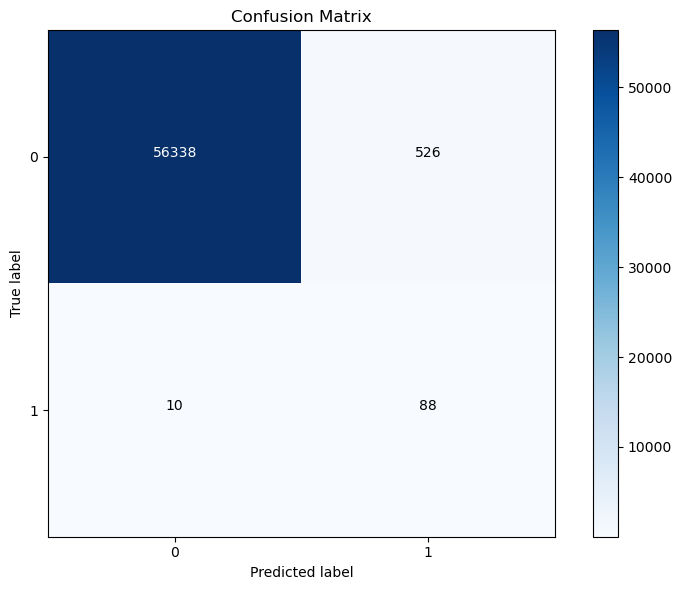

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

#labels to confusion matrix
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

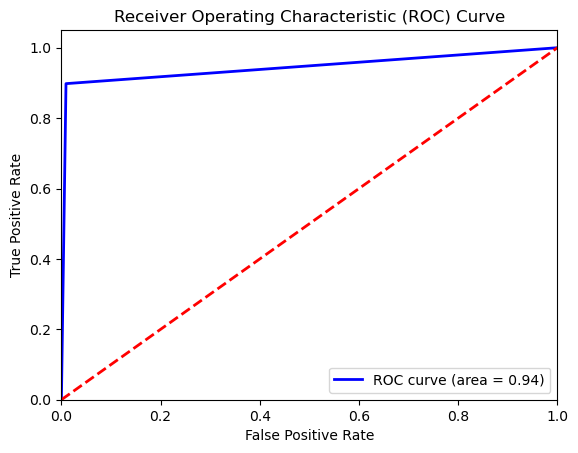

In [35]:
from sklearn.metrics import roc_curve, auc

#ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


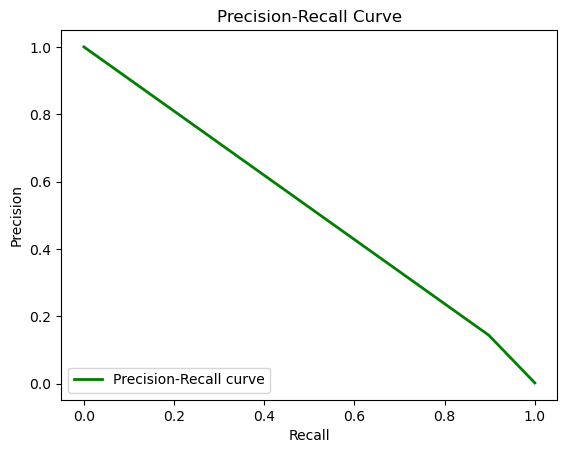

In [36]:
from sklearn.metrics import precision_recall_curve

#Precision-Recall curve 
precision, recall, _ = precision_recall_curve(y_test, y_pred)

#Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

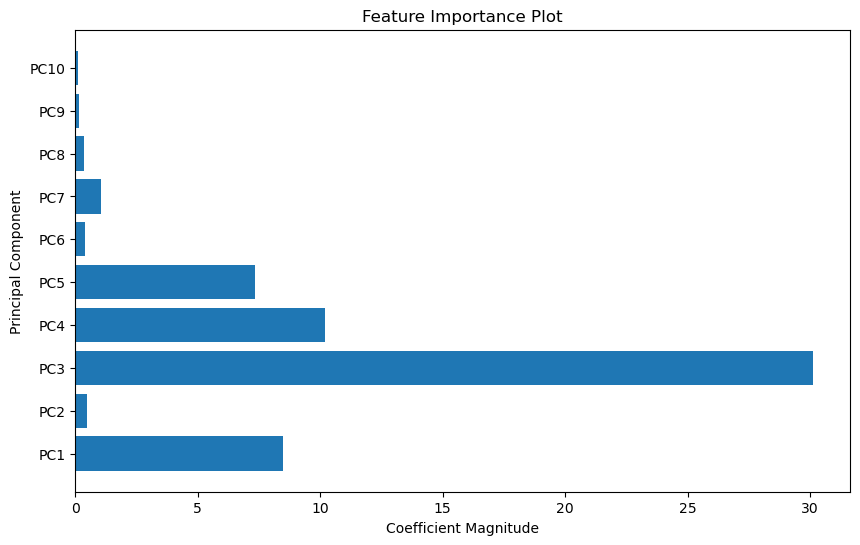

In [30]:
import matplotlib.pyplot as plt

#absolute coefficients of the logistic regression model
coefficients = abs(logistic_regression.named_steps['logisticregression'].coef_[0])

#names of the features before PCA transformation
pca_components = pca.components_

#names of the original features using the PCA components
feature_names_pca = [f'PC{i+1}' for i in range(len(pca_components))]

#feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names_pca, coefficients)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Principal Component')
plt.title('Feature Importance Plot')
plt.show()

Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest classifier 
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)

#Fitting
random_forest.fit(X_train_pca, y_train_resampled)

#Predict on the test set
y_pred_rf = random_forest.predict(X_test_pca)

#evaluation metrics
accuracy_rf = random_forest.score(X_test_pca, y_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

#evaluation report for Random Forest
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Random Forest Classifier Evaluation:
Accuracy: 0.9973842210596539
Confusion Matrix:
 [[56726   138]
 [   11    87]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.89      0.54        98

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962



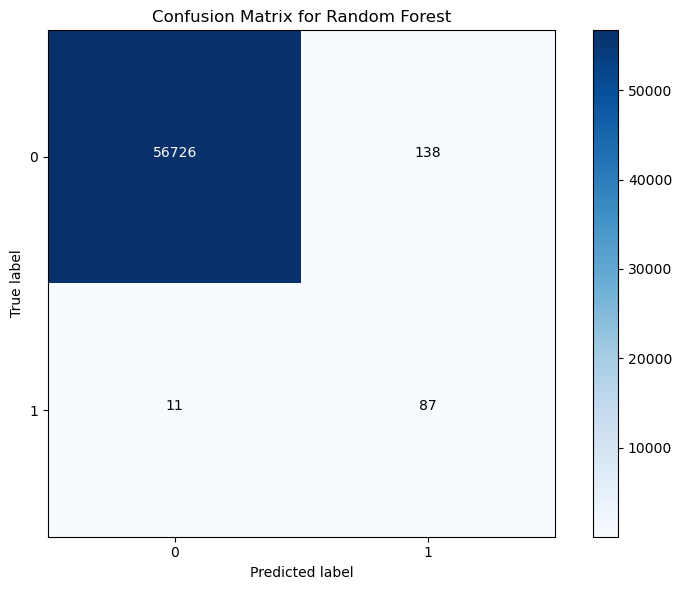

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np

#confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

#confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.colorbar()

#labels to confusion matrix
classes_rf = np.unique(y_test)
tick_marks_rf = np.arange(len(classes_rf))
plt.xticks(tick_marks_rf, classes_rf)
plt.yticks(tick_marks_rf, classes_rf)
thresh_rf = conf_matrix_rf.max() / 2.
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(j, i, format(conf_matrix_rf[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_rf[i, j] > thresh_rf else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

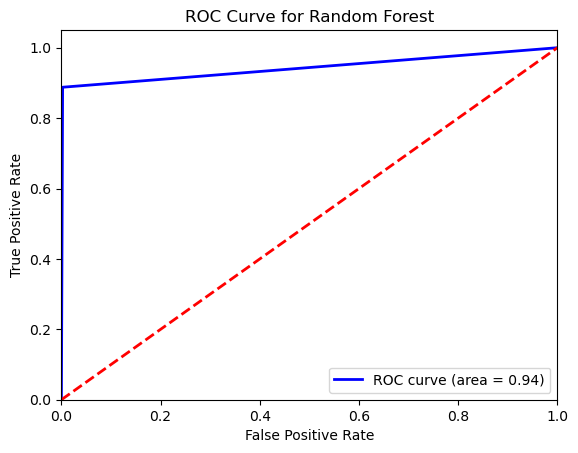

In [39]:
from sklearn.metrics import roc_curve, auc

#ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

#ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

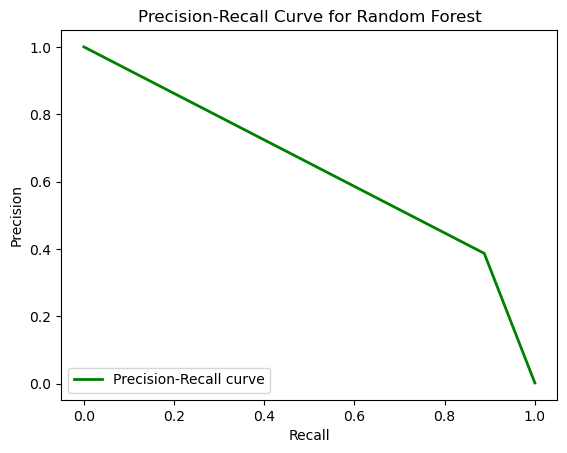

In [40]:
from sklearn.metrics import precision_recall_curve

#Precision-Recall curve and area under it for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)

#Precision-Recall curve for Random Forest
plt.figure()
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc="lower left")
plt.show()

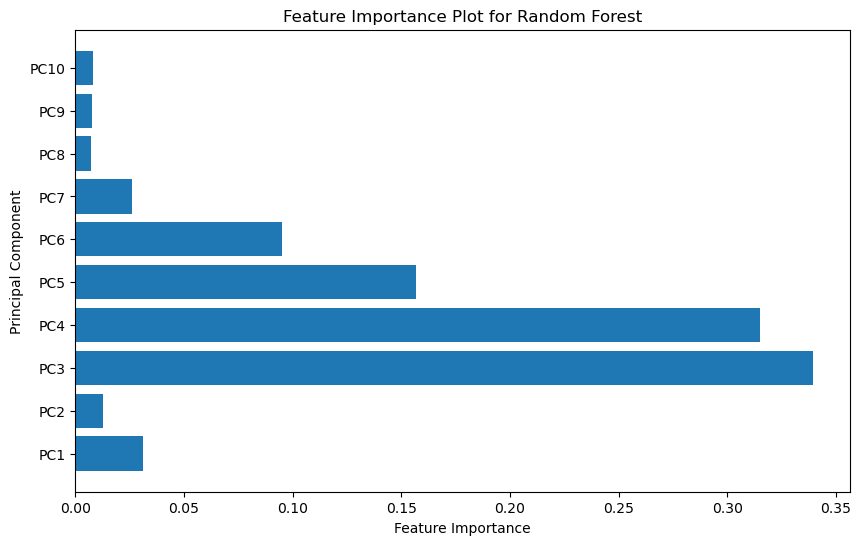

In [41]:
#feature importances from the Random Forest classifier
feature_importances_rf = random_forest.feature_importances_

#names of the features before PCA transformation to align feature importances with the correct feature names
feature_names_pca = [f'PC{i+1}' for i in range(len(pca_components))]

#feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_names_pca, feature_importances_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Principal Component')
plt.title('Feature Importance Plot for Random Forest')
plt.show()


In [24]:
y_pred_rf = random_forest.predict(X_test_pca)

#predicted labels
print("Predicted labels for new data:", y_pred_rf)

Predicted labels for new data: [1 0 0 ... 0 0 0]


In [25]:
import numpy as np

new_entry = np.array([[123456,   # Time
                       1.5,      # V1
                       -2.0,     # V2
                       0.8,      # V3
                       0.3,      # V4
                       -1.2,     # V5
                       0.5,      # V6
                       -0.7,     # V7
                       0.2,      # V8
                       -0.5,     # V9
                       1.0,      # V10
                       0.6,      # V11
                       -0.3,     # V12
                       0.9,      # V13
                       -0.4,     # V14
                       0.7,      # V15
                       -0.6,     # V16
                       0.1,      # V17
                       -0.8,     # V18
                       0.4,      # V19
                       -0.9,     # V20
                       0.2,      # V21
                       -1.0,     # V22
                       0.3,      # V23
                       -0.5,     # V24
                       0.6,      # V25
                       -0.7,     # V26
                       0.8,      # V27
                       -0.2,     # V28
                       100.0,    # Amount
                       0.0]])    # Adding one additional feature


new_entry_processed = pca.transform(new_entry)  # Apply the same PCA transformation

# Predict whether the new entry is a fraud or not
predicted_label = random_forest.predict(new_entry_processed)

# Print the predicted label
if predicted_label == 1:
    print("The model predicts that the new entry is a fraud.")
else:
    print("The model predicts that the new entry is not a fraud.")

The model predicts that the new entry is not a fraud.


E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [58]:
import numpy as np

new_entry_fraud = np.array([[406,   # Time
                       -2.31223,      # V1
                       1.951992,     # V2
                       -1.60985,      # V3
                       3.997906,      # V4
                       -0.52219,     # V5
                       -1.42655,      # V6
                       -2.53739,     # V7
                       1.391657,      # V8
                       -2.77009,     # V9
                       -2.77227,      # V10
                       3.202033,      # V11
                       -2.89991,     # V12
                       -0.9522,      # V13
                       -4.28925,     # V14
                       0.389724,      # V15
                       -1.14075,     # V16
                       -2.83006,      # V17
                       -0.01682,     # V18
                       0.416956,      # V19
                       0.126911,     # V20
                       0.517232,      # V21
                       -0.3505,     # V22
                       -0.46521,      # V23
                       0.320198,     # V24
                       0.044519,      # V25
                       0.17784,     # V26
                       0.261145,      # V27
                       -0.14328,     # V28
                       0.0,    # Amount
                       0.0]])    # Adding one additional feature


new_entry_processed_fraud = pca.transform(new_entry_fraud)  # Apply the same PCA transformation

# Predict whether the new entry is a fraud or not
predicted_label_1 = random_forest.predict(new_entry_processed_fraud)

# Print the predicted label
if predicted_label_1 == 1:
    print("The model predicts that the new entry is a fraud.")
else:
    print("The model predicts that the new entry is not a fraud.")

The model predicts that the new entry is a fraud.


E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


# Summary:


1. Data Collection:
The initial data is collected from the Kaggle.(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

The dataset is stored in a csv file named "creditcard.csv" and it consists of the credit card transactions and information about the fraudulent transactions.

The dataset contains 31 numerical features (including V1 to V28), which are the result of the PCA transformation due to privacy reasons. It also contains the features such as 'Time' and 'Amount'.

The features V1 to V28 in the credit card fraud dataset represent transformed or anonymized features derived from the original credit card transaction data.

The 'Time' feature represents the seconds elapsed between each transaction and the first transaction in the dataset.

The 'Amount' feature denotes the transaction amount.

The target variable 'Class' indicates whether a transaction is fraudulent (1) or not (0).

One of the key characteristics of this dataset is its severe class imbalance.

The majority of transactions are non-fraudulent, while fraudulent transactions are rare occurrences.

Class imbalance can significantly affect the performance of machine learning models, particularly in fraud detection tasks.

2. Data Visualization:
I have performed data visualization to provide insights into the credit card transaction dataset. 

Exploratory Data Analysis (EDA):

a. Histograms are used to visualize the distribution of the 'V1' feature.

b. Scatter plot is created to visualize the relationship between 'Time' and 'Amount'.

c. A correlation heatmap is generated to visualize the correlation between numerical features in the dataset.

3. Data Preprocessing/Preparation:

a. Handling Missing Values:
Missing values in the dataset are identified using the isnull().sum() method, which counts the number of missing values for each feature.

The SimpleImputer class from scikit-learn is used to fill missing values with the mean strategy, ensuring that no missing values are present in the dataset before proceeding with model training.

b. Scaling Features:
The 'Amount' feature in the dataset is scaled using the StandardScaler from scikit-learn.
Scaling is important for ensuring that all features have the same scale and range, which helps improve the performance of certain machine learning algorithms, such as logistic regression and KMeans clustering.

c. Dealing with Imbalanced Data using SMOTE:
Synthetic Minority Over-sampling Technique (SMOTE) is applied to handle the class imbalance in the dataset.
SMOTE generates synthetic samples for the minority class (fraudulent transactions) to balance the class distribution.
The SMOTE class from the imbalanced-learn library is used to perform SMOTE resampling on the training data.

d. Dimensionality Reduction with PCA:
Principal Component Analysis (PCA) is applied to reduce the dimensionality of the dataset.
PCA helps in reducing the number of features while preserving as much variance as possible in the data.
The PCA class from scikit-learn is used to perform PCA transformation, reducing the number of features to 10 components.


In summary, data preparation involves handling missing values, scaling features, reducing dimensionality with PCA, and addressing class imbalance using SMOTE. These steps ensure that the dataset is well-prepared and suitable for training machine learning models, ultimately improving the models' performance and effectiveness in detecting fraudulent transactions.

4. Model Classification: I have used 2 classification techniques.

a. Logistic Regression Model:
A logistic regression model is created using a pipeline that includes feature scaling (StandardScaler) and logistic regression classifier (LogisticRegression).

The model is trained on the resampled and PCA-transformed training data (X_train_pca and y_train_resampled).

Predictions are made on the PCA-transformed test set (X_test_pca) using the trained model. Performance metrics such as accuracy, confusion matrix, and classification report are calculated and printed to evaluate the model's performance.

Confusion matrix, ROC curve, and Precision-Recall curve are visualized to further assess the model's performance.

Feature importances of the logistic regression model are plotted to understand the importance of different features in the model's predictions.

b. Random Forest Classifier:
A random forest classifier is instantiated with specified parameters such as the number of estimators (n_estimators=100), maximum depth of the trees (max_depth=10), and utilizing all available processors (n_jobs=-1).

The model is trained on the resampled and PCA-transformed training data (X_train_pca and y_train_resampled).

Predictions are made on the PCA-transformed test set (X_test_pca) using the trained model. Performance metrics such as accuracy, confusion matrix, and classification report are calculated and printed to evaluate the model's performance.

Confusion matrix, ROC curve, and Precision-Recall curve for the random forest classifier are visualized to further assess the model's performance.

Feature importances of the random forest classifier are plotted to understand the importance of different features in the model's predictions.

In summary, model classification involves training logistic regression and random forest classifier models, evaluating their performance using various metrics and visualizations, and understanding the importance of different features in predicting fraudulent transactions. These steps help in selecting the most suitable model for fraud detection based on its performance and interpretability.

5. Predictions:

Both model are highly accurate but the random forest had the slightest advantage over logistic regression. So, I have used the random forest model to perform the predictions.

The trained Random Forest classifier is used to predict whether a new credit card transaction is fraudulent or not.

Synthetic data representing a new credit card transaction is created and transformed using the same PCA transformation applied to the training data (new_entry_processed).

The predict() method is then applied to the transformed data to obtain the predicted label.

Based on the predicted label, a message is printed indicating whether the model predicts the new transaction to be fraudulent or non-fraudulent.

6. Conclusion:

In conclusion, my model showcases a comprehensive approach to credit card fraud detection using machine learning techniques. Through data exploration, preprocessing, model training, and evaluation, the code effectively addresses the challenges associated with class imbalance, missing data, and high dimensionality. 

By selecting and fine-tuning the random forest classifier, the model demonstrates strong performance in accurately identifying fraudulent transactions.

The use cases for this solution extend beyond credit card fraud detection. Similar methodologies can be applied in various industries, including healthcare, insurance, and e-commerce, to detect anomalies, identify fraudulent activities, and enhance security measures. 

Furthermore, the insights gained from the data visualization and feature importance analysis provide valuable information for decision-making processes, risk assessment, and fraud prevention strategies.

Overall, the implemented solution serves as a versatile tool for data-driven organizations seeking to mitigate risks and safeguard their operations against fraudulent activities.